In [4]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model,save_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="Male (class 1) vs Female (class 0) \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction Gender (Male vs Female)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::5],precision[::5],label="Male vs Female \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Gender (Male vs Female)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



353/353 [==============================] - 0s 931us/step


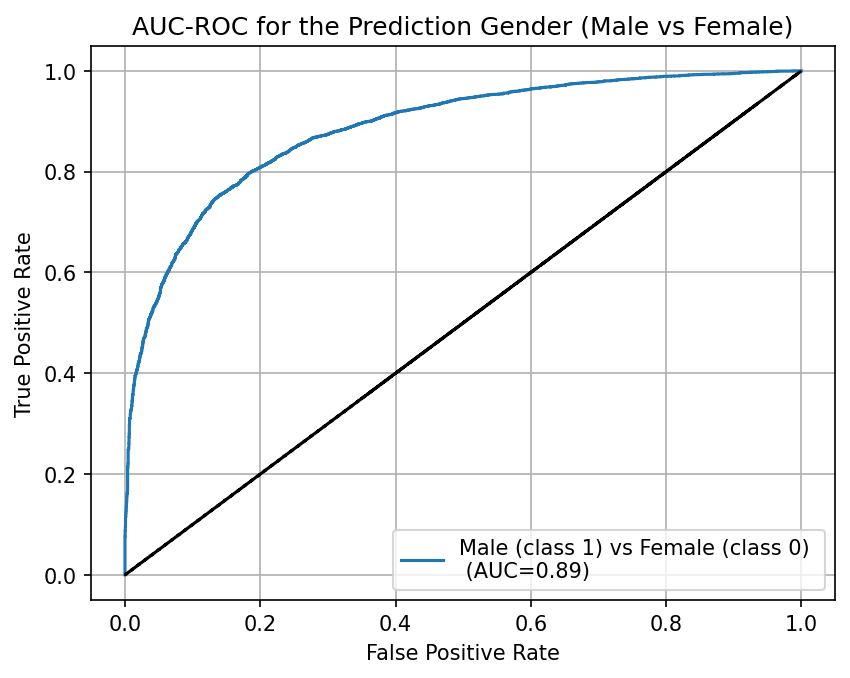

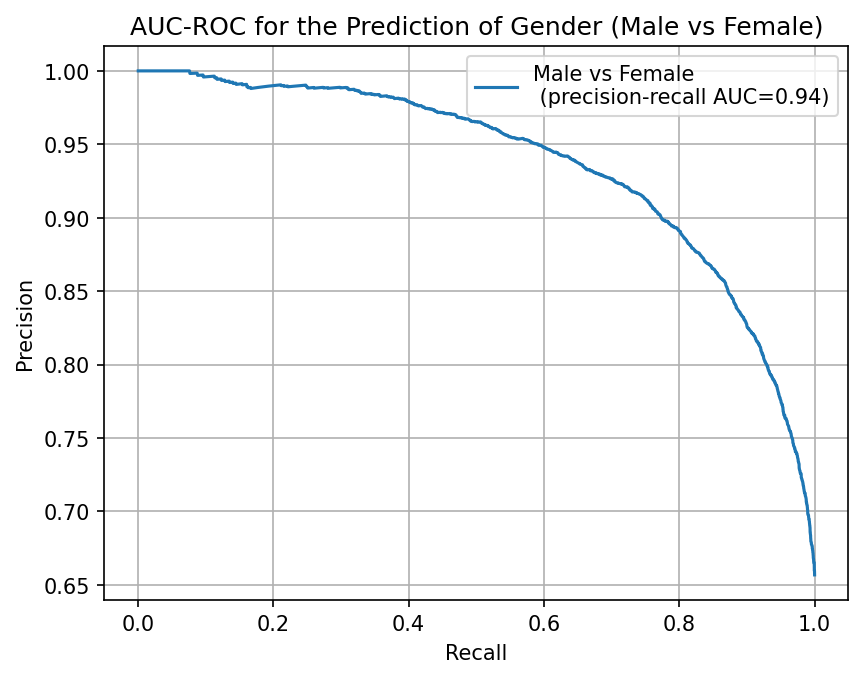

The optimum Threshold is: 0.81
              precision    recall  f1-score   support

         0.0       0.56      0.93      0.70      3873
         1.0       0.94      0.62      0.75      7411

    accuracy                           0.73     11284
   macro avg       0.75      0.77      0.72     11284
weighted avg       0.81      0.73      0.73     11284

[[3602  271]
 [2817 4594]]


In [6]:
name = 'chexpert_sex_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
np.save('mm_test_data.npy',test_data)

x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')

save_model(model_chex_total,'mm_mdl.h5')

y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 879us/step


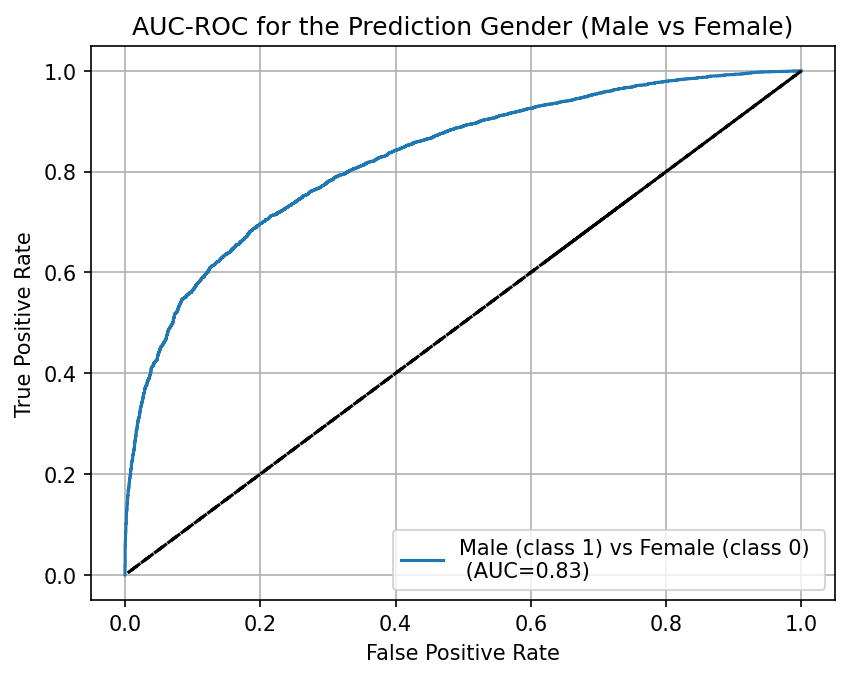

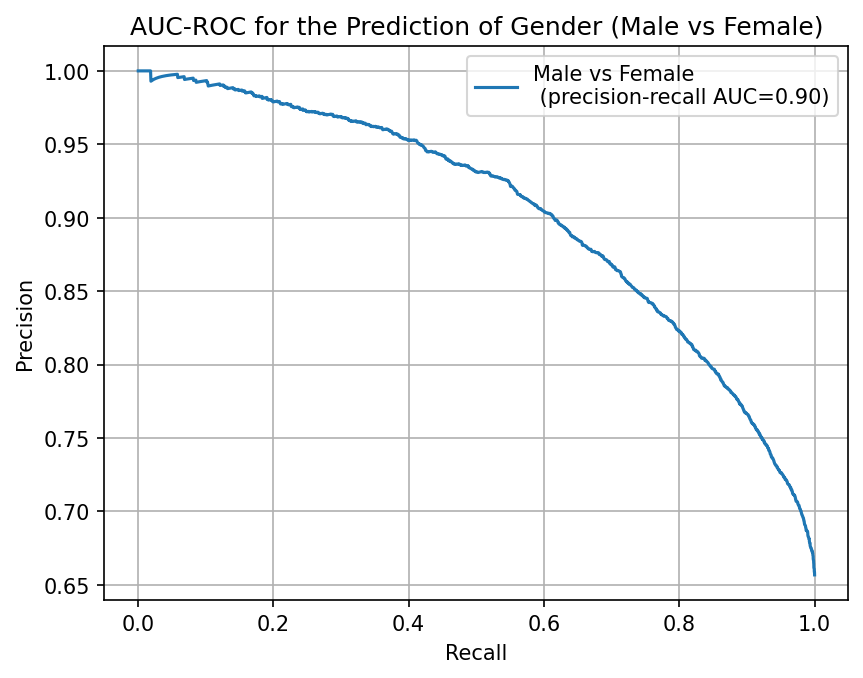

The optimum Threshold is: 0.75
              precision    recall  f1-score   support

         0.0       0.51      0.91      0.66      3873
         1.0       0.92      0.55      0.69      7411

    accuracy                           0.67     11284
   macro avg       0.72      0.73      0.67     11284
weighted avg       0.78      0.67      0.68     11284

[[3524  349]
 [3320 4091]]


In [6]:
name = 'chexpert_sex_segment_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_0 = test_data['x_test']
y_chex_seg_0 = test_data['y_test']
mask_chex_seg_0 = test_data['mask_excluded']
model_chex_seg_0 = load_model(name + '_mdl.h5')
y_predict_chex_seg_0 = model_chex_seg_0.predict(x_chex_seg_0[:,mask_chex_seg_0])
AUC_ROC_Binary(y_true=y_chex_seg_0,y_score=y_predict_chex_seg_0)
AUC_Precision_Recall(y_true=y_chex_seg_0,y_score=y_predict_chex_seg_0)
threshold = prob2categ(y_chex_seg_0,y_predict_chex_seg_0)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_0.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_0, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_0, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 990us/step


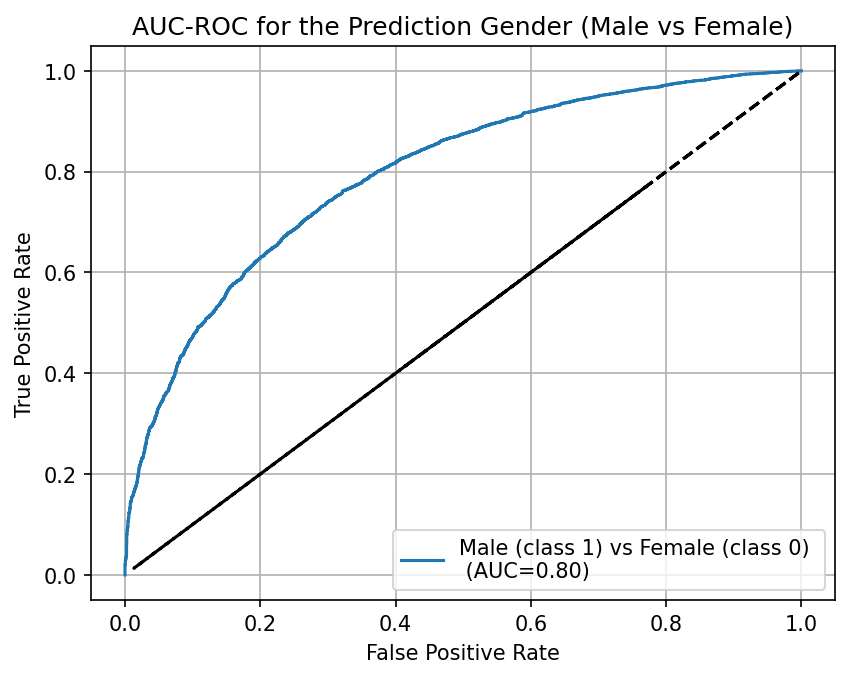

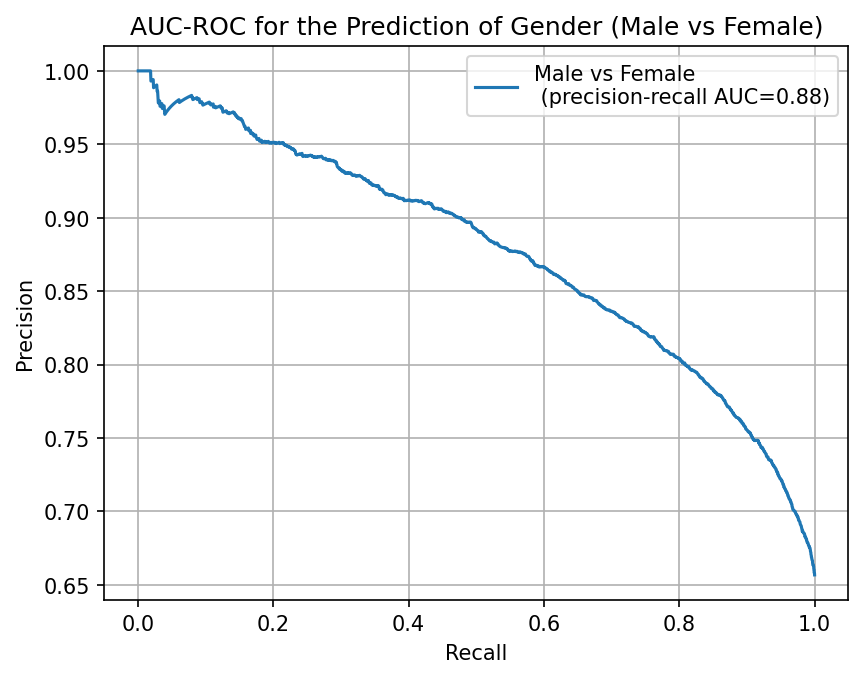

The optimum Threshold is: 0.72
              precision    recall  f1-score   support

         0.0       0.50      0.85      0.63      3873
         1.0       0.88      0.56      0.68      7411

    accuracy                           0.66     11284
   macro avg       0.69      0.70      0.66     11284
weighted avg       0.75      0.66      0.67     11284

[[3292  581]
 [3263 4148]]


In [7]:
name = 'chexpert_sex_segment_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_1 = test_data['x_test']
y_chex_seg_1 = test_data['y_test']
mask_chex_seg_1 = test_data['mask_excluded']
model_chex_seg_1 = load_model(name + '_mdl.h5')
y_predict_chex_seg_1 = model_chex_seg_1.predict(x_chex_seg_1[:,mask_chex_seg_1])
AUC_ROC_Binary(y_true=y_chex_seg_1,y_score=y_predict_chex_seg_1)
AUC_Precision_Recall(y_true=y_chex_seg_1,y_score=y_predict_chex_seg_1)
threshold = prob2categ(y_chex_seg_1,y_predict_chex_seg_1)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_1.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_1, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_1, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 915us/step


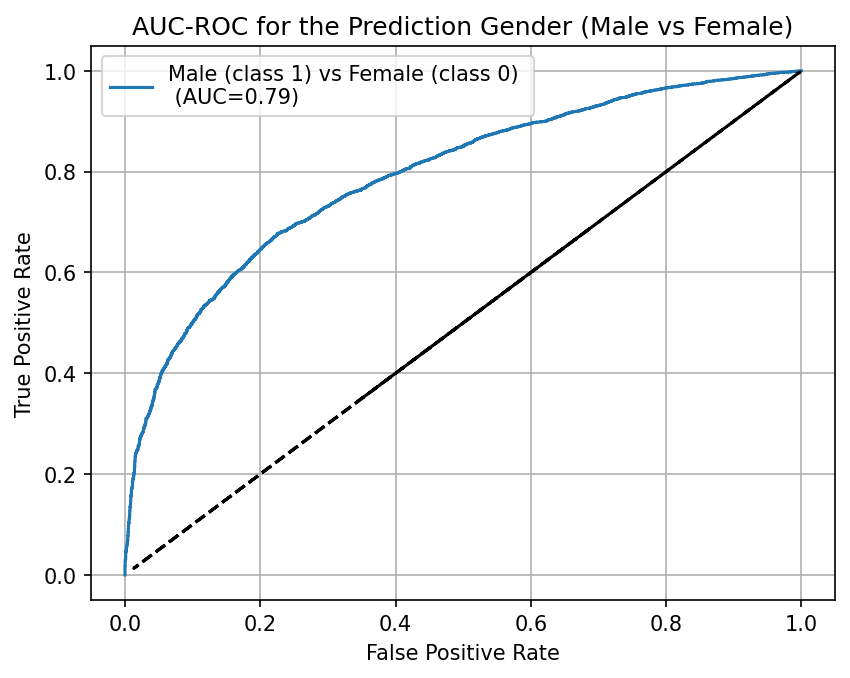

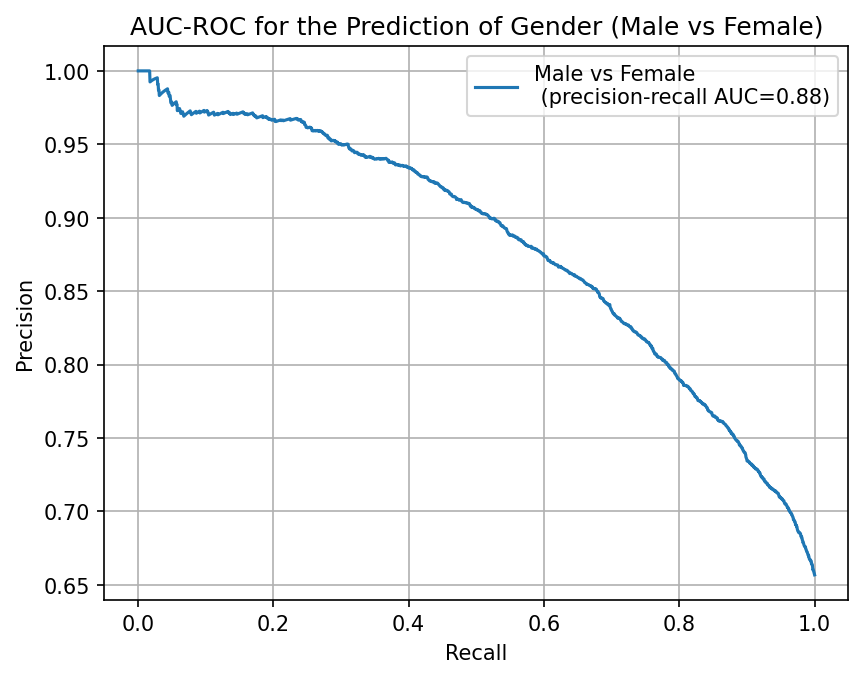

The optimum Threshold is: 0.72
              precision    recall  f1-score   support

         0.0       0.49      0.89      0.63      3873
         1.0       0.90      0.52      0.66      7411

    accuracy                           0.65     11284
   macro avg       0.70      0.70      0.65     11284
weighted avg       0.76      0.65      0.65     11284

[[3455  418]
 [3578 3833]]


In [8]:
name = 'chexpert_sex_segment_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_2 = test_data['x_test']
y_chex_seg_2 = test_data['y_test']
mask_chex_seg_2 = test_data['mask_excluded']
model_chex_seg_2 = load_model(name + '_mdl.h5')
y_predict_chex_seg_2 = model_chex_seg_2.predict(x_chex_seg_2[:,mask_chex_seg_2])
AUC_ROC_Binary(y_true=y_chex_seg_2,y_score=y_predict_chex_seg_2)
AUC_Precision_Recall(y_true=y_chex_seg_2,y_score=y_predict_chex_seg_2)
threshold = prob2categ(y_chex_seg_2,y_predict_chex_seg_2)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_2.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_2, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_2, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 823us/step


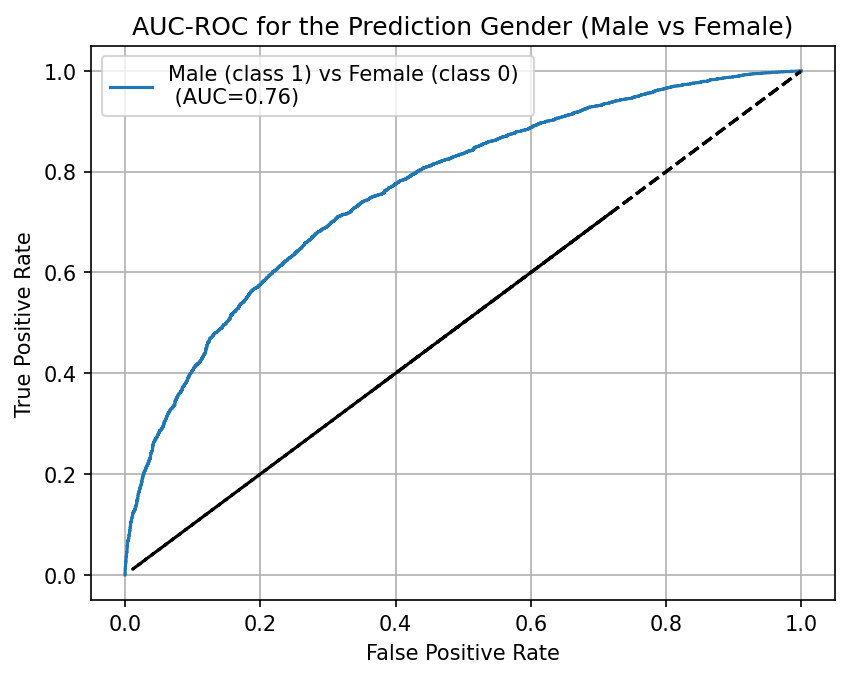

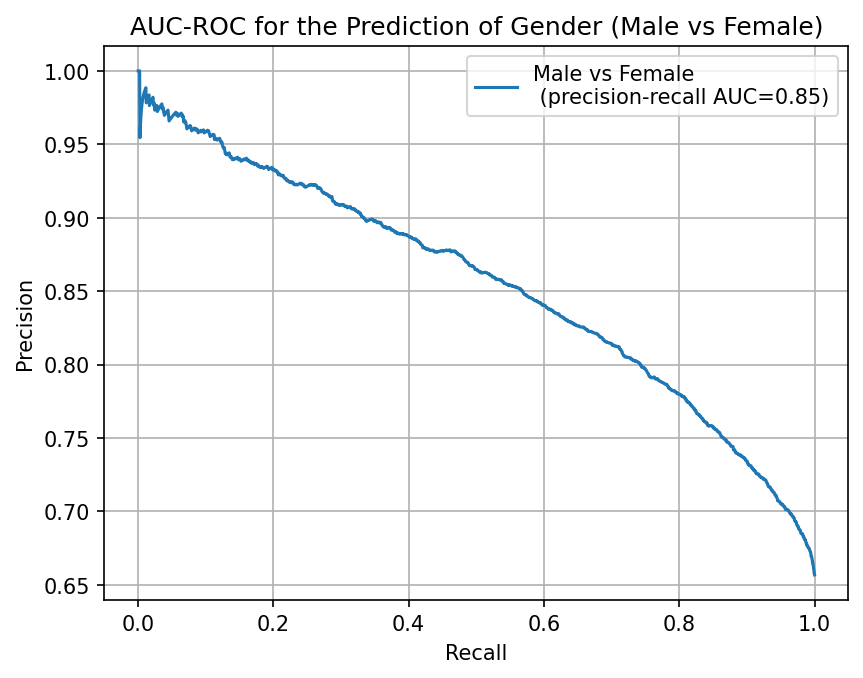

The optimum Threshold is: 0.70
              precision    recall  f1-score   support

         0.0       0.46      0.88      0.60      3873
         1.0       0.88      0.46      0.61      7411

    accuracy                           0.60     11284
   macro avg       0.67      0.67      0.60     11284
weighted avg       0.73      0.60      0.60     11284

[[3391  482]
 [3981 3430]]


In [9]:
name = 'chexpert_sex_segment_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_seg_3 = test_data['x_test']
y_chex_seg_3 = test_data['y_test']
mask_chex_seg_3 = test_data['mask_excluded']
model_chex_seg_3 = load_model(name + '_mdl.h5')
y_predict_chex_seg_3 = model_chex_seg_3.predict(x_chex_seg_3[:,mask_chex_seg_3])
AUC_ROC_Binary(y_true=y_chex_seg_3,y_score=y_predict_chex_seg_3)
AUC_Precision_Recall(y_true=y_chex_seg_3,y_score=y_predict_chex_seg_3)
threshold = prob2categ(y_chex_seg_3,y_predict_chex_seg_3)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_seg_3.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_seg_3, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_seg_3, y_pred=class_pred)
print(cm)